In [3]:
import openml
import autosklearn.regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import time

# ✅ Multi-output dataset IDs
dataset_ids = [41477, 41491, 41478]
results = []

for openml_id in dataset_ids:
    print(f"\n🚀 Running Auto-Sklearn (Multi-Output) on Dataset {openml_id}")

    # ✅ Load dataset and extract multiple targets manually
    dataset = openml.datasets.get_dataset(openml_id)
    df, _, _, _ = dataset.get_data()
    
    target_cols = dataset.default_target_attribute.split(",")
    target_cols = [col.strip() for col in target_cols]
    
    X = df.drop(columns=target_cols)
    y = df[target_cols].astype(np.float64)
    
    print(f"🧪 X shape: {X.shape}, y shape: {y.shape}")
    
    # ✅ Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # ✅ Define AutoSklearn wrapped in MultiOutputRegressor
    base_regressor = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=900,
        per_run_time_limit=120,
        ensemble_kwargs={'ensemble_size': 20},
        n_jobs=-1,
        resampling_strategy='holdout',
        initial_configurations_via_metalearning=10,
    )

    model = MultiOutputRegressor(base_regressor)

    # ✅ Fit
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # ✅ Predict
    y_pred = model.predict(X_test)

    # ✅ Compute and Store Metrics for Each Target
    target_metrics = {}
    r2_scores = []
    mses = []

    for i, col in enumerate(y.columns):
        y_true = y_test.iloc[:, i]
        y_pred_col = y_pred[:, i]
        mse = mean_squared_error(y_true, y_pred_col)
        r2 = r2_score(y_true, y_pred_col)

        target_metrics[f"{col}_R2"] = round(r2, 4)
        target_metrics[f"{col}_MSE"] = round(mse, 4)

        r2_scores.append(r2)
        mses.append(mse)

    # ✅ Average metrics
    avg_r2 = np.mean(r2_scores)
    avg_mse = np.mean(mses)

    # ✅ Collect all metrics in one result row
    result_row = {
        "Dataset ID": openml_id,
        "AutoSklearn Avg R²": round(avg_r2, 4),
        "AutoSklearn Avg MSE": round(avg_mse, 4),
        "AutoSklearn Time (s)": round(fit_time, 2),
    }
    result_row.update(target_metrics)  # 🔥 Add all per-target R² and MSE
    results.append(result_row)

 


    print(f"✅ Completed Dataset {openml_id} | Time: {fit_time:.2f}s")
    for k, v in target_metrics.items():
        print(f"  🔹 {k}: {v}")

# ✅ Save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("autosklearn_multioutput_results.csv", index=False)

print("\n📁 Results saved to 'autosklearn_multioutput_results.csv'")
print("🎉 Multi-Output Regression Completed!")



🚀 Running Auto-Sklearn (Multi-Output) on Dataset 41477
🧪 X shape: (154, 16), y shape: (154, 2)
✅ Completed Dataset 41477 | Time: 1794.40s
  🔹 DFlow_R2: 0.5177
  🔹 DFlow_MSE: 0.1068
  🔹 DGap_R2: 0.3891
  🔹 DGap_MSE: 0.2255

🚀 Running Auto-Sklearn (Multi-Output) on Dataset 41491
🧪 X shape: (1060, 16), y shape: (1060, 14)
[WARNING] [2025-04-05 18:24:54,613:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2025-04-05 18:24:57,145:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2025-04-05 18:25:05,090:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2025-04-05 18:25:08,238:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [202

/home/g24m1535/autosklearn-env/lib/python3.8/site-packages/sklearn/metrics/_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/home/g24m1535/autosklearn-env/lib/python3.8/site-packages/sklearn/metrics/_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/home/g24m1535/autosklearn-env/lib/python3.8/site-packages/sklearn/metrics/_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/home/g24m1535/autosklearn-env/lib/python3.8/site-packages/sklearn/metrics/_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/home/g24m1535/autosklearn-env/lib/python3.8/site-packages/sklearn/metrics/_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).su

✅ Completed Dataset 41491 | Time: 12602.25s
  🔹 x25400_R2: 0.0903
  🔹 x25400_MSE: 1.9517
  🔹 x29600_R2: -0.0293
  🔹 x29600_MSE: 2.1099
  🔹 x30400_R2: 0.0715
  🔹 x30400_MSE: 0.7576
  🔹 x33400_R2: -755.1246
  🔹 x33400_MSE: 654.4335
  🔹 x17300_R2: 0.1673
  🔹 x17300_MSE: 0.9735
  🔹 x19400_R2: 0.2956
  🔹 x19400_MSE: 1.9292
  🔹 x34500_R2: -0.0067
  🔹 x34500_MSE: 0.6258
  🔹 x38100_R2: 0.1517
  🔹 x38100_MSE: 1.2448
  🔹 x49700_R2: 0.3129
  🔹 x49700_MSE: 2.2811
  🔹 x50390_R2: 0.179
  🔹 x50390_MSE: 1.8957
  🔹 x55800_R2: 0.1512
  🔹 x55800_MSE: 1.4483
  🔹 x57500_R2: 0.1691
  🔹 x57500_MSE: 0.6381
  🔹 x59300_R2: 0.0947
  🔹 x59300_MSE: 1.6573
  🔹 x37880_R2: 0.2228
  🔹 x37880_MSE: 1.7018

🚀 Running Auto-Sklearn (Multi-Output) on Dataset 41478
🧪 X shape: (768, 8), y shape: (768, 2)
✅ Completed Dataset 41478 | Time: 1804.83s
  🔹 Y1_R2: 0.9979
  🔹 Y1_MSE: 0.2144
  🔹 Y2_R2: 0.9783
  🔹 Y2_MSE: 2.0019

📁 Results saved to 'autosklearn_multioutput_results.csv'
🎉 Multi-Output Regression Completed!


/tmp/ipykernel_270511/3126705281.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_vals, ax=axes[0], palette="Blues_d")
/tmp/ipykernel_270511/3126705281.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels, rotation=45)
/tmp/ipykernel_270511/3126705281.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=mse_vals, ax=axes[1], palette="Oranges_d")
/tmp/ipykernel_270511/3126705281.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels, rotation=45)
/tmp/ipykernel_270511/3126705281.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from 

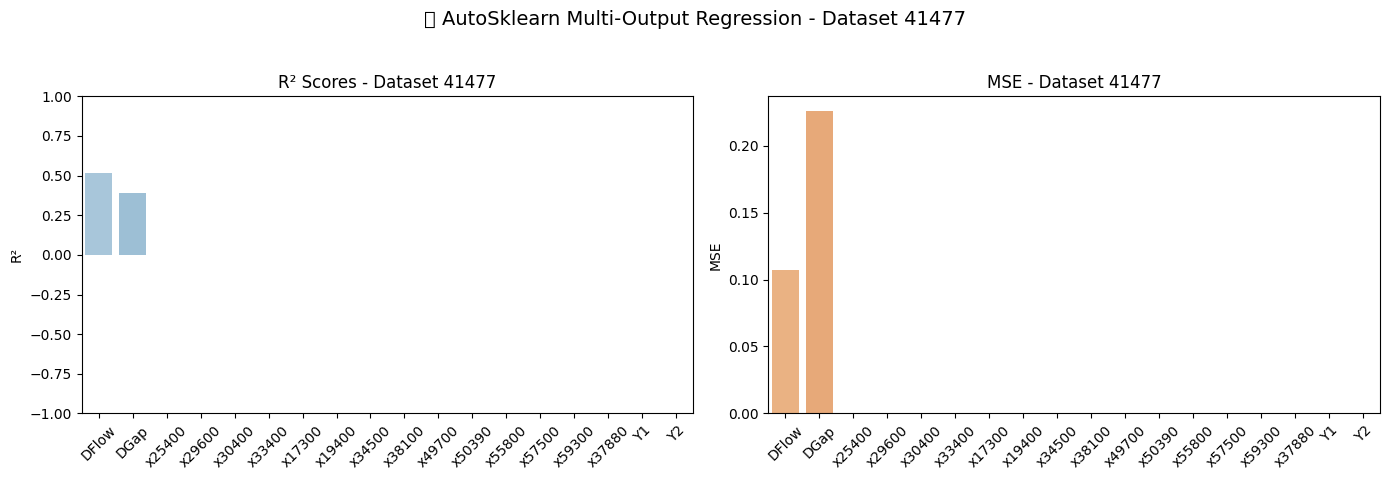

/tmp/ipykernel_270511/3126705281.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_vals, ax=axes[0], palette="Blues_d")
/tmp/ipykernel_270511/3126705281.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels, rotation=45)
/tmp/ipykernel_270511/3126705281.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=mse_vals, ax=axes[1], palette="Oranges_d")
/tmp/ipykernel_270511/3126705281.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels, rotation=45)
/tmp/ipykernel_270511/3126705281.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from 

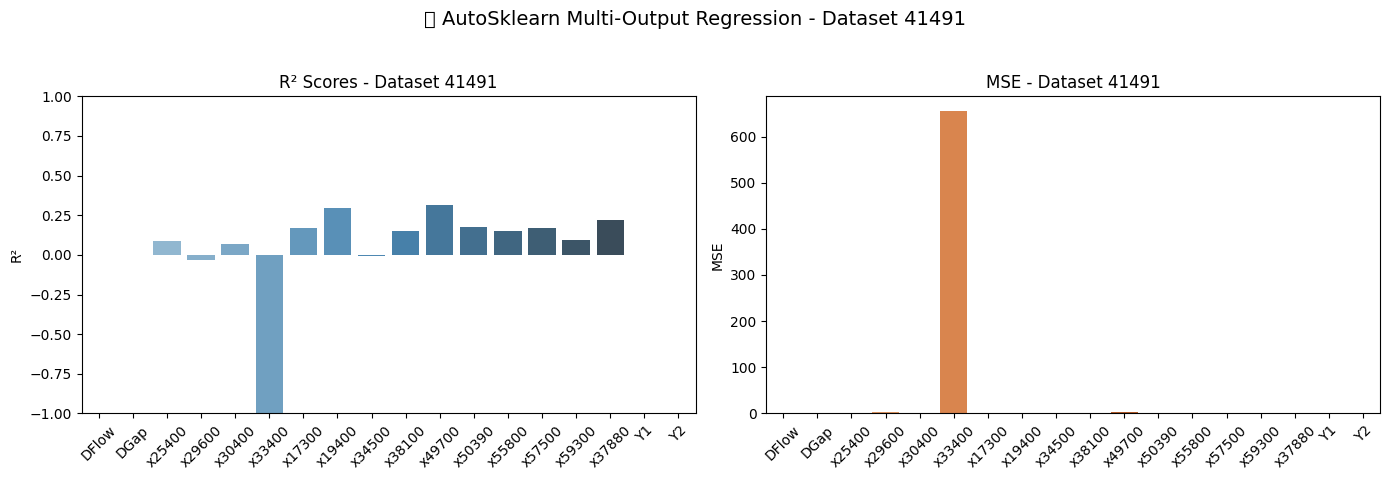

/tmp/ipykernel_270511/3126705281.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_vals, ax=axes[0], palette="Blues_d")
/tmp/ipykernel_270511/3126705281.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels, rotation=45)
/tmp/ipykernel_270511/3126705281.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=mse_vals, ax=axes[1], palette="Oranges_d")
/tmp/ipykernel_270511/3126705281.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels, rotation=45)
/tmp/ipykernel_270511/3126705281.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from 

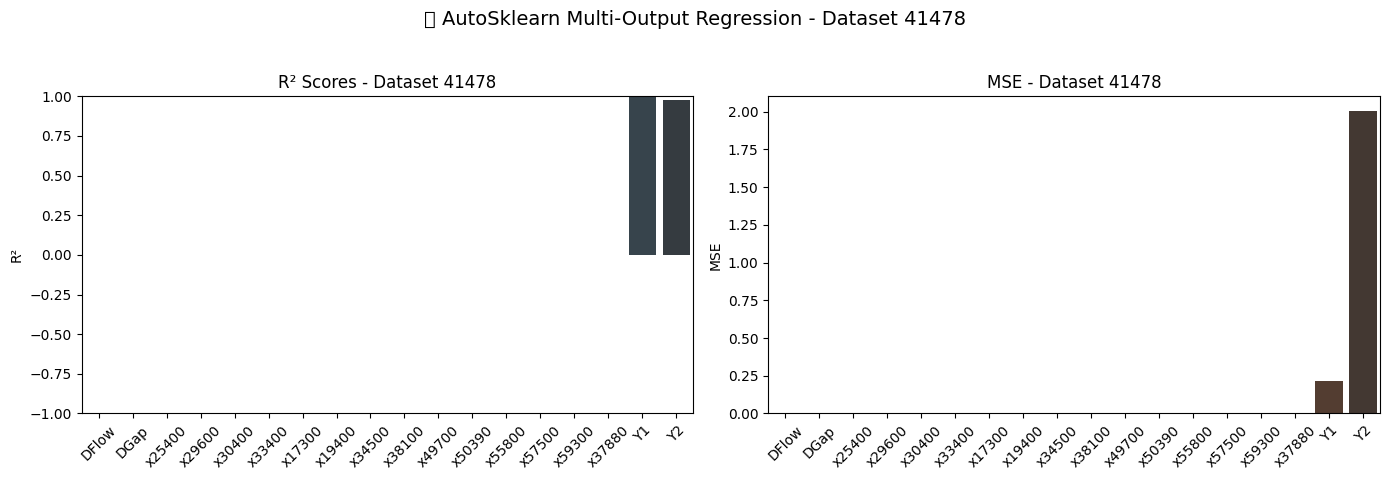

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 🔽 Load results
results_df = pd.read_csv("autosklearn_multioutput_results.csv")

# 🔽 Create directory to save plots
os.makedirs("multioutput_metric_plots", exist_ok=True)

# 🔽 Plot both R² and MSE per label
for idx, row in results_df.iterrows():
    dataset_id = row["Dataset ID"]
    
    # Extract R² and MSE values
    r2_scores = {col.replace("_R2", ""): val for col, val in row.items() if col.endswith("_R2")}
    mse_scores = {col.replace("_MSE", ""): val for col, val in row.items() if col.endswith("_MSE")}
    
    labels = list(r2_scores.keys())
    r2_vals = [r2_scores[label] for label in labels]
    mse_vals = [mse_scores[label] for label in labels]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # 🔷 R² Plot
    sns.barplot(x=labels, y=r2_vals, ax=axes[0], palette="Blues_d")
    axes[0].set_title(f"R² Scores - Dataset {int(dataset_id)}")
    axes[0].set_ylabel("R²")
    axes[0].set_xticklabels(labels, rotation=45)
    axes[0].set_ylim(-1, 1)

    # 🔶 MSE Plot
    sns.barplot(x=labels, y=mse_vals, ax=axes[1], palette="Oranges_d")
    axes[1].set_title(f"MSE - Dataset {int(dataset_id)}")
    axes[1].set_ylabel("MSE")
    axes[1].set_xticklabels(labels, rotation=45)

    plt.suptitle(f"📊 AutoSklearn Multi-Output Regression - Dataset {int(dataset_id)}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save figure
    plt.savefig(f"multioutput_metric_plots/dataset_{int(dataset_id)}_metrics.png")
    plt.show()
